# light_gbm demo rank

In [1]:
import pandas as pd
import numpy as np

import json
import lightgbm as lgb
from sklearn import datasets

In [2]:
train_filePath = './demo_data/rank.train'
test_filePath = './demo_data/rank.test'

In [3]:
X_train, y_train = datasets.load_svmlight_file(train_filePath)

In [4]:
type(X_train), type(y_train)

(scipy.sparse.csr.csr_matrix, numpy.ndarray)

In [5]:
X_train.shape, y_train.shape

((3005, 300), (3005,))

In [6]:
X_train, y_train = datasets.load_svmlight_file(train_filePath)
X_test, y_test = datasets.load_svmlight_file(test_filePath)

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3005, 300) (3005,)
(768, 300) (768,)


In [8]:
def load_group_file(file_path):
    group = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                group.append(int(line.strip()))
            except Exception as ex:
                print("Exception happen at line:", line)
    return group

In [9]:
dtrain = lgb.Dataset(train_filePath)
dtrain_group = load_group_file("./demo_data/rank.train.query")
dtrain.set_group(dtrain_group)

dtest = lgb.Dataset(train_filePath)
dtest_group = load_group_file("./demo_data/rank.test.query")
dtest.set_group(dtest_group)

print(len(dtrain_group), len(dtest_group))
print(sum(dtrain_group), sum(dtest_group))

201 50
3005 768


In [20]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train, silent=0)
lgb_train.set_group(dtrain_group)

lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, silent=0)
lgb_test = lgb.Dataset(X_test, y_test, silent=0)
lgb_test.set_group(dtest_group)

In [22]:
lgb_test.data

<768x300 sparse matrix of type '<class 'numpy.float64'>'
	with 74663 stored elements in Compressed Sparse Row format>

In [14]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'lambdarank',
#     'metric': 'ndcg',
#     'metric': 'map',
    'metric': ['ndcg', 'map'],
    'metric_freq' : 1,
    'ndcg_eval_at' : '1,3,5,',
#     'ndcg_eval_at' : '3',
    'is_training_metric' : True,
    'max_bin' : 255,
    'num_leaves': 31,
#     'num_trees' : 100,
    'learning_rate': 0.1,
    'learning_rate': 0.05,
    'tree_learner': 'serial',
    'min_data_in_leaf' :50,
    'min_sum_hessian_in_leaf': 50,
    'is_enable_sparse': True,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 10,
    'verbose_eval ': 10,
}

In [15]:
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=10000,
    early_stopping_rounds=1000,
    valid_sets=[lgb_test],
)

[1]	valid_0's map@1: 0.74	valid_0's map@3: 0.749444	valid_0's map@5: 0.730217	valid_0's ndcg@1: 0.505714	valid_0's ndcg@3: 0.569303	valid_0's ndcg@5: 0.620413
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's map@1: 0.78	valid_0's map@3: 0.741111	valid_0's map@5: 0.73435	valid_0's ndcg@1: 0.565905	valid_0's ndcg@3: 0.611018	valid_0's ndcg@5: 0.635723
[3]	valid_0's map@1: 0.86	valid_0's map@3: 0.787778	valid_0's map@5: 0.77955	valid_0's ndcg@1: 0.664952	valid_0's ndcg@3: 0.64714	valid_0's ndcg@5: 0.689205
[4]	valid_0's map@1: 0.86	valid_0's map@3: 0.813333	valid_0's map@5: 0.771717	valid_0's ndcg@1: 0.670667	valid_0's ndcg@3: 0.65214	valid_0's ndcg@5: 0.67133
[5]	valid_0's map@1: 0.84	valid_0's map@3: 0.774444	valid_0's map@5: 0.75685	valid_0's ndcg@1: 0.635048	valid_0's ndcg@3: 0.624826	valid_0's ndcg@5: 0.656964
[6]	valid_0's map@1: 0.88	valid_0's map@3: 0.783889	valid_0's map@5: 0.768283	valid_0's ndcg@1: 0.655619	valid_0's ndcg@3: 0.628489	valid_0's ndcg@

[55]	valid_0's map@1: 0.76	valid_0's map@3: 0.767222	valid_0's map@5: 0.746833	valid_0's ndcg@1: 0.608762	valid_0's ndcg@3: 0.635772	valid_0's ndcg@5: 0.657347
[56]	valid_0's map@1: 0.76	valid_0's map@3: 0.777222	valid_0's map@5: 0.754867	valid_0's ndcg@1: 0.608762	valid_0's ndcg@3: 0.649239	valid_0's ndcg@5: 0.663313
[57]	valid_0's map@1: 0.76	valid_0's map@3: 0.781111	valid_0's map@5: 0.761967	valid_0's ndcg@1: 0.595429	valid_0's ndcg@3: 0.648575	valid_0's ndcg@5: 0.661386
[58]	valid_0's map@1: 0.76	valid_0's map@3: 0.777222	valid_0's map@5: 0.750967	valid_0's ndcg@1: 0.608762	valid_0's ndcg@3: 0.65008	valid_0's ndcg@5: 0.663167
[59]	valid_0's map@1: 0.76	valid_0's map@3: 0.781667	valid_0's map@5: 0.755833	valid_0's ndcg@1: 0.595429	valid_0's ndcg@3: 0.650718	valid_0's ndcg@5: 0.668235
[60]	valid_0's map@1: 0.76	valid_0's map@3: 0.785	valid_0's map@5: 0.766367	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.649937	valid_0's ndcg@5: 0.669623
[61]	valid_0's map@1: 0.76	valid_0's map@3: 

[170]	valid_0's map@1: 0.74	valid_0's map@3: 0.741667	valid_0's map@5: 0.746467	valid_0's ndcg@1: 0.546857	valid_0's ndcg@3: 0.616053	valid_0's ndcg@5: 0.665513
[171]	valid_0's map@1: 0.74	valid_0's map@3: 0.741667	valid_0's map@5: 0.746467	valid_0's ndcg@1: 0.564	valid_0's ndcg@3: 0.619481	valid_0's ndcg@5: 0.668238
[172]	valid_0's map@1: 0.74	valid_0's map@3: 0.746111	valid_0's map@5: 0.750933	valid_0's ndcg@1: 0.564	valid_0's ndcg@3: 0.623125	valid_0's ndcg@5: 0.670231
[173]	valid_0's map@1: 0.74	valid_0's map@3: 0.746111	valid_0's map@5: 0.750933	valid_0's ndcg@1: 0.564	valid_0's ndcg@3: 0.626317	valid_0's ndcg@5: 0.672095
[174]	valid_0's map@1: 0.74	valid_0's map@3: 0.746111	valid_0's map@5: 0.754933	valid_0's ndcg@1: 0.548	valid_0's ndcg@3: 0.62315	valid_0's ndcg@5: 0.671807
[175]	valid_0's map@1: 0.74	valid_0's map@3: 0.743889	valid_0's map@5: 0.754267	valid_0's ndcg@1: 0.548	valid_0's ndcg@3: 0.620729	valid_0's ndcg@5: 0.670967
[176]	valid_0's map@1: 0.74	valid_0's map@3: 0.748

[246]	valid_0's map@1: 0.76	valid_0's map@3: 0.742222	valid_0's map@5: 0.747733	valid_0's ndcg@1: 0.561905	valid_0's ndcg@3: 0.608401	valid_0's ndcg@5: 0.673388
[247]	valid_0's map@1: 0.76	valid_0's map@3: 0.742222	valid_0's map@5: 0.747733	valid_0's ndcg@1: 0.561905	valid_0's ndcg@3: 0.608401	valid_0's ndcg@5: 0.673388
[248]	valid_0's map@1: 0.76	valid_0's map@3: 0.748889	valid_0's map@5: 0.75	valid_0's ndcg@1: 0.561905	valid_0's ndcg@3: 0.618401	valid_0's ndcg@5: 0.674831
[249]	valid_0's map@1: 0.76	valid_0's map@3: 0.748889	valid_0's map@5: 0.754	valid_0's ndcg@1: 0.575238	valid_0's ndcg@3: 0.622431	valid_0's ndcg@5: 0.679988
[250]	valid_0's map@1: 0.76	valid_0's map@3: 0.742222	valid_0's map@5: 0.748333	valid_0's ndcg@1: 0.575238	valid_0's ndcg@3: 0.611974	valid_0's ndcg@5: 0.676492
[251]	valid_0's map@1: 0.76	valid_0's map@3: 0.748889	valid_0's map@5: 0.75	valid_0's ndcg@1: 0.569905	valid_0's ndcg@3: 0.621143	valid_0's ndcg@5: 0.67628
[252]	valid_0's map@1: 0.76	valid_0's map@3: 0

[337]	valid_0's map@1: 0.78	valid_0's map@3: 0.749444	valid_0's map@5: 0.7634	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.616392	valid_0's ndcg@5: 0.678674
[338]	valid_0's map@1: 0.78	valid_0's map@3: 0.756111	valid_0's map@5: 0.7604	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.621085	valid_0's ndcg@5: 0.672751
[339]	valid_0's map@1: 0.78	valid_0's map@3: 0.762778	valid_0's map@5: 0.7614	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.625778	valid_0's ndcg@5: 0.673221
[340]	valid_0's map@1: 0.78	valid_0's map@3: 0.769444	valid_0's map@5: 0.7664	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.627342	valid_0's ndcg@5: 0.679786
[341]	valid_0's map@1: 0.78	valid_0's map@3: 0.762778	valid_0's map@5: 0.7654	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.622649	valid_0's ndcg@5: 0.679316
[342]	valid_0's map@1: 0.78	valid_0's map@3: 0.762778	valid_0's map@5: 0.7654	valid_0's ndcg@1: 0.591048	valid_0's ndcg@3: 0.623413	valid_0's ndcg@5: 0.680798
[343]	valid_0's map@1: 0.78	valid_0's map@3: 0

[432]	valid_0's map@1: 0.78	valid_0's map@3: 0.781667	valid_0's map@5: 0.7884	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.635933	valid_0's ndcg@5: 0.692061
[433]	valid_0's map@1: 0.78	valid_0's map@3: 0.782778	valid_0's map@5: 0.785867	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.637162	valid_0's ndcg@5: 0.691991
[434]	valid_0's map@1: 0.78	valid_0's map@3: 0.782778	valid_0's map@5: 0.785867	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.638351	valid_0's ndcg@5: 0.692947
[435]	valid_0's map@1: 0.78	valid_0's map@3: 0.782778	valid_0's map@5: 0.785867	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.6399	valid_0's ndcg@5: 0.694332
[436]	valid_0's map@1: 0.78	valid_0's map@3: 0.776111	valid_0's map@5: 0.783867	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.639126	valid_0's ndcg@5: 0.696114
[437]	valid_0's map@1: 0.78	valid_0's map@3: 0.772778	valid_0's map@5: 0.778667	valid_0's ndcg@1: 0.604381	valid_0's ndcg@3: 0.636478	valid_0's ndcg@5: 0.691963
[438]	valid_0's map@1: 0.78	valid_0's 

[510]	valid_0's map@1: 0.78	valid_0's map@3: 0.783889	valid_0's map@5: 0.787733	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.643049	valid_0's ndcg@5: 0.693156
[511]	valid_0's map@1: 0.78	valid_0's map@3: 0.783889	valid_0's map@5: 0.787733	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.643049	valid_0's ndcg@5: 0.693156
[512]	valid_0's map@1: 0.78	valid_0's map@3: 0.783889	valid_0's map@5: 0.787733	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.643049	valid_0's ndcg@5: 0.695393
[513]	valid_0's map@1: 0.78	valid_0's map@3: 0.783889	valid_0's map@5: 0.787733	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.643049	valid_0's ndcg@5: 0.695393
[514]	valid_0's map@1: 0.78	valid_0's map@3: 0.783889	valid_0's map@5: 0.787733	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.643049	valid_0's ndcg@5: 0.694502
[515]	valid_0's map@1: 0.78	valid_0's map@3: 0.781667	valid_0's map@5: 0.782867	valid_0's ndcg@1: 0.608952	valid_0's ndcg@3: 0.64182	valid_0's ndcg@5: 0.692976
[516]	valid_0's map@1: 0.78	valid_0

[568]	valid_0's map@1: 0.78	valid_0's map@3: 0.765556	valid_0's map@5: 0.780033	valid_0's ndcg@1: 0.595619	valid_0's ndcg@3: 0.630207	valid_0's ndcg@5: 0.686712
[569]	valid_0's map@1: 0.8	valid_0's map@3: 0.771111	valid_0's map@5: 0.783367	valid_0's ndcg@1: 0.615619	valid_0's ndcg@3: 0.63509	valid_0's ndcg@5: 0.690408
[570]	valid_0's map@1: 0.8	valid_0's map@3: 0.771111	valid_0's map@5: 0.783367	valid_0's ndcg@1: 0.615619	valid_0's ndcg@3: 0.631993	valid_0's ndcg@5: 0.690047
[571]	valid_0's map@1: 0.78	valid_0's map@3: 0.767778	valid_0's map@5: 0.781367	valid_0's ndcg@1: 0.595619	valid_0's ndcg@3: 0.6254	valid_0's ndcg@5: 0.687231
[572]	valid_0's map@1: 0.78	valid_0's map@3: 0.772222	valid_0's map@5: 0.7822	valid_0's ndcg@1: 0.595619	valid_0's ndcg@3: 0.633222	valid_0's ndcg@5: 0.688085
[573]	valid_0's map@1: 0.78	valid_0's map@3: 0.772222	valid_0's map@5: 0.7852	valid_0's ndcg@1: 0.595619	valid_0's ndcg@3: 0.628348	valid_0's ndcg@5: 0.690599
[574]	valid_0's map@1: 0.78	valid_0's map@3

[689]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7805	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.622022	valid_0's ndcg@5: 0.68839
[690]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7813	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.622022	valid_0's ndcg@5: 0.688688
[691]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7807	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.622022	valid_0's ndcg@5: 0.688289
[692]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7807	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.622022	valid_0's ndcg@5: 0.685268
[693]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7807	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.625982	valid_0's ndcg@5: 0.685261
[694]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	valid_0's map@5: 0.7807	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.625982	valid_0's ndcg@5: 0.685261
[695]	valid_0's map@1: 0.8	valid_0's map@3: 0.766111	

[791]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.775433	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.628789	valid_0's ndcg@5: 0.685868
[792]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.775433	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.628789	valid_0's ndcg@5: 0.685868
[793]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.774033	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.628789	valid_0's ndcg@5: 0.685419
[794]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.774033	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.628789	valid_0's ndcg@5: 0.685419
[795]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.774033	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.631811	valid_0's ndcg@5: 0.688047
[796]	valid_0's map@1: 0.8	valid_0's map@3: 0.774444	valid_0's map@5: 0.774033	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.631811	valid_0's ndcg@5: 0.688047
[797]	valid_0's map@1: 0.8	valid_0's map

[890]	valid_0's map@1: 0.8	valid_0's map@3: 0.771667	valid_0's map@5: 0.7789	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.6285	valid_0's ndcg@5: 0.686401
[891]	valid_0's map@1: 0.8	valid_0's map@3: 0.771667	valid_0's map@5: 0.7789	valid_0's ndcg@1: 0.588952	valid_0's ndcg@3: 0.6285	valid_0's ndcg@5: 0.686401
[892]	valid_0's map@1: 0.8	valid_0's map@3: 0.771667	valid_0's map@5: 0.7789	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.632074	valid_0's ndcg@5: 0.689638
[893]	valid_0's map@1: 0.8	valid_0's map@3: 0.773333	valid_0's map@5: 0.780567	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.629667	valid_0's ndcg@5: 0.690015
[894]	valid_0's map@1: 0.8	valid_0's map@3: 0.773333	valid_0's map@5: 0.780567	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.629667	valid_0's ndcg@5: 0.690015
[895]	valid_0's map@1: 0.8	valid_0's map@3: 0.773333	valid_0's map@5: 0.780567	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.629667	valid_0's ndcg@5: 0.690015
[896]	valid_0's map@1: 0.8	valid_0's map@3: 0.7733

[992]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7829	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.637867	valid_0's ndcg@5: 0.690597
[993]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7869	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.638152	valid_0's ndcg@5: 0.693472
[994]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7869	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.638152	valid_0's ndcg@5: 0.693472
[995]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7869	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.638152	valid_0's ndcg@5: 0.693472
[996]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7845	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.637867	valid_0's ndcg@5: 0.692531
[997]	valid_0's map@1: 0.8	valid_0's map@3: 0.787222	valid_0's map@5: 0.7869	valid_0's ndcg@1: 0.602286	valid_0's ndcg@3: 0.638152	valid_0's ndcg@5: 0.693472
[998]	valid_0's map@1: 0.8	valid_0's map@3: 0.788889

In [24]:
preds = gbm.predict(lgb_test.data)
print(lgb_test.data.shape, len(preds))

(768, 300) 768


In [25]:
import matplotlib.pyplot as plt

In [26]:
lgb_test.get_group()[0]

12

In [27]:
group_1th = lgb_test.get_group()[0]
group_1th

12

In [28]:
watch_list = [[], []]
for i in range(group_1th):
    print('%4d | %f | %f' % (i, lgb_test.label[i], preds[i]))
    watch_list[0].append(lgb_test.label[i])
    watch_list[1].append(preds[i])

   0 | 2.000000 | 0.024020
   1 | 3.000000 | 0.035393
   2 | 2.000000 | -0.047604
   3 | 0.000000 | -0.034938
   4 | 2.000000 | -0.047651
   5 | 1.000000 | -0.052647
   6 | 2.000000 | 0.013902
   7 | 0.000000 | -0.005087
   8 | 2.000000 | 0.008950
   9 | 1.000000 | -0.058199
  10 | 2.000000 | -0.038383
  11 | 1.000000 | -0.058199


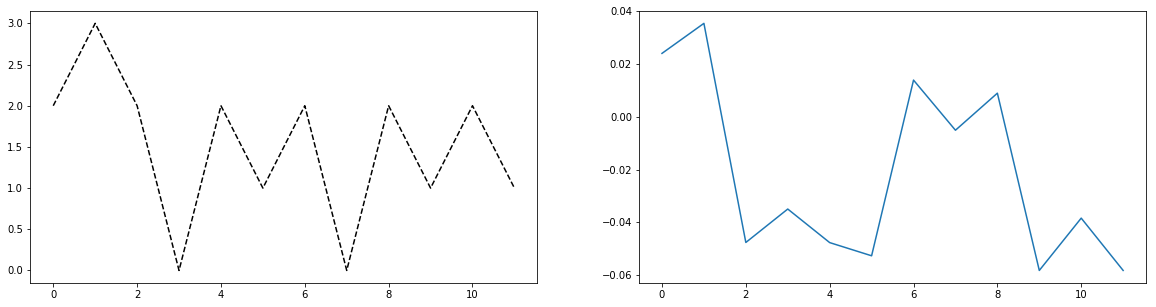

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot('121')
plt.plot(watch_list[0], 'k--')
plt.subplot('122')
plt.plot(watch_list[1])
plt.show()